In [4]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from ipyleaflet import Map, Marker
import plotly.express as px
import geopandas as gpd
from sklearn.linear_model import LinearRegression
%matplotlib inline
# 한글 설정
# pip install koreanize_matplotlib
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
root = 'C:/workspace/python/project/data/'

# 구글드라이브 : https://drive.google.com/drive/folders/1zIzm1o8-3uxcWSU2DoWpB8aV0Oxdfz_P?usp=sharing

In [ ]:
!pip install folium geopandas pandas

In [ ]:
!pip install folium


In [ ]:
!pip install ipyleaflet

In [ ]:
'''
서울시 집값 데이터 프레임
'''
seoul_2021_df = pd.read_csv(root + '부동산_Data/부동산_2021.csv', encoding = 'cp949')
seoul_2022_df = pd.read_csv(root + '부동산_Data/부동산_2022.csv', encoding = 'cp949')
seoul_2023_df = pd.read_csv(root + '부동산_Data/부동산_2023.csv', encoding = 'cp949')

In [ ]:
# 서울시 집값 데이터 확인
display(seoul_2021_df.info())
print()
print('+=' * 20)
print()
display(seoul_2022_df.info())
print()
print('+=' * 20)
print()
display(seoul_2023_df.info())

In [ ]:
# dict_keys(['2019년 12월 31일 기준', '2020년 12월 31일 기준', '2021년 12월 31일 기준', '2022년 12월 31일 기준', '2023년 12월 4일 기준'])
all_bus_stop_dict = pd.read_excel(root + '교통_Data/버스_정류소현황(2019~2023년).xlsx', sheet_name=None)

In [ ]:
'''
버스 정류장 데이터 프레임
'''
bus_stop_2021_df = all_bus_stop_dict['2021년 12월 31일 기준']
bus_stop_2022_df = all_bus_stop_dict['2022년 12월 31일 기준']
bus_stop_2023_df = all_bus_stop_dict['2023년 12월 4일 기준']

In [ ]:
# 서울시 버스정류장 정보 확인
display(bus_stop_2021_df.info())
print()
print('+=' * 20)
print()
display(bus_stop_2022_df.info())
print()
print('+=' * 20)
print()
display(bus_stop_2023_df.info())

In [ ]:
'''
지하철 데이터 프레임
'''
train_2021_df = pd.read_csv(root + '교통_Data/서울시 지역별 지하철역 정보_2021.csv', encoding = 'cp949')
train_2022_df = pd.read_csv(root + '교통_Data/서울시 지역별 지하철역 정보_2022.csv', encoding = 'cp949')
train_2023_df = pd.read_csv(root + '교통_Data/서울시 지역별 지하철역 정보_2023.csv', encoding = 'cp949')

In [ ]:
# 지하철 정보 확인
train_2021_df.info()
print()
print('+=' * 20)
print()
train_2022_df.info()
print()
print('+=' * 20)
print()
train_2023_df.info()

In [ ]:
'''
주거실태 데이터 프레임
'''
abode_family_df = pd.read_csv(root + '주거실태_Data/거처의_종류_및_거처__가구__가구원__시군구_20241120174650.csv', encoding = 'cp949')
abode_house_category = pd.read_csv(root + '주거실태_Data/주택의_종류별_주택__읍면동_연도_끝자리_0__5___시군구_그_외_연도__20241120174542.csv', encoding = 'cp949')

In [ ]:
# 주거실태 정보 확인
abode_family_df.info()
print()
print('+=' * 20)
print()
abode_house_category.info()

In [ ]:
'''
공원 데이터 프레임
'''
park_2021_df = pd.read_excel(root + '공원_Data/공원현황_2021.xlsx')
park_2022_df = pd.read_excel(root + '공원_Data/공원현황_2022.xlsx')
park_2023_df = pd.read_excel(root + '공원_Data/공원현황_2023.xlsx')

In [ ]:
# 공원 정보 확인
display(park_2021_df.info())
print()
print('+=' * 20)
print()
display(park_2022_df.info())
print()
print('+=' * 20)
print()
display(park_2023_df.info())

In [ ]:
'''
유통업체 데이터 프레임
'''
distributor_2021_df = pd.read_excel(root + '유통업체_Data/유통업체현황_2021.xlsx')
distributor_2022_df = pd.read_excel(root + '유통업체_Data/유통업체현황_2022.xlsx')
distributor_2023_df = pd.read_excel(root + '유통업체_Data/유통업체현황_2023.xlsx')

In [ ]:
# 유통업체 정보 확인
display(distributor_2021_df.info())
print()
print('+=' * 20)
print()
display(distributor_2022_df.info())
print()
print('+=' * 20)
print()
display(distributor_2023_df.info())

In [ ]:
'''
의료기간 데이터 프레임
'''
medical_2021_df = pd.read_excel(root + '의료기관_Data/의료기관_2021.xlsx')
medical_2022_df = pd.read_excel(root + '의료기관_Data/의료기관_2022.xlsx')
medical_2023_df = pd.read_excel(root + '의료기관_Data/의료기관_2023.xlsx')

In [ ]:
# 의료기간 정보 확인
display(medical_2021_df.info())
print()
print('+=' * 20)
print()
display(medical_2022_df.info())
print()
print('+=' * 20)
print()
display(medical_2023_df.info())

In [ ]:
#지도 생성 ( 서울 중심으로 좌표를 잡음)
map_center = [37.5665, 126.9780]
map = folium.Map(location=map_center, zoom_start=12)
map

In [ ]:
#실행안됨
# 1. 데이터 로드 (자치구별 역 개수)
train_2021_df = pd.DataFrame({
    '자치구': ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구',  '중구', '중랑구'],
    '역개수': [21, 14, 3, 9, 4, 11, 7, 1, 13, 3, 6, 12, 16, 5, 12, 14, 9, 28, 5, 11, 10, 13, 15, 23, 8]
})

# 2. 서울시 자치구 GeoJSON 파일 로드 (GeoPandas를 이용)
gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# 서울시 자치구 데이터만 필터링 (예시로 서울시만 필터링)
seoul = gdf[gdf['name'] == 'South Korea']  # 서울시 경계만 선택 (실제로는 서울시 경계를 찾는 코드를 추가해야 함)

# 3. 자치구별 역 개수와 자치구 경계 데이터 병합
# 자치구 GeoJSON 데이터에 역개수 정보를 매핑합니다.
seoul = seoul.set_index('name')
df = df.set_index('자치구')

# 데이터 병합 (자치구 이름으로 병합)
merged = seoul.join(df)

# 4. 지도 생성
m = folium.Map(location=[37.5665, 126.9780], zoom_start=12)

# 5. 자치구별로 색상 변화 주기 (역 개수에 따라)
# 병합된 데이터에서 '역개수' 값에 따라 색상을 다르게 설정
folium.Choropleth(
    geo_data=seoul.geometry.__geo_interface__,  # 서울시 GeoJSON 데이터
    name='choropleth',
    data=merged,
    columns=['역개수', '역개수'],
    key_on='feature.id',  # GeoJSON feature id로 키 설정
    fill_color='YlGnBu',  # 색상 스케일
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='자치구별 역개수'
).add_to(m)

# 6. 지도 출력
m


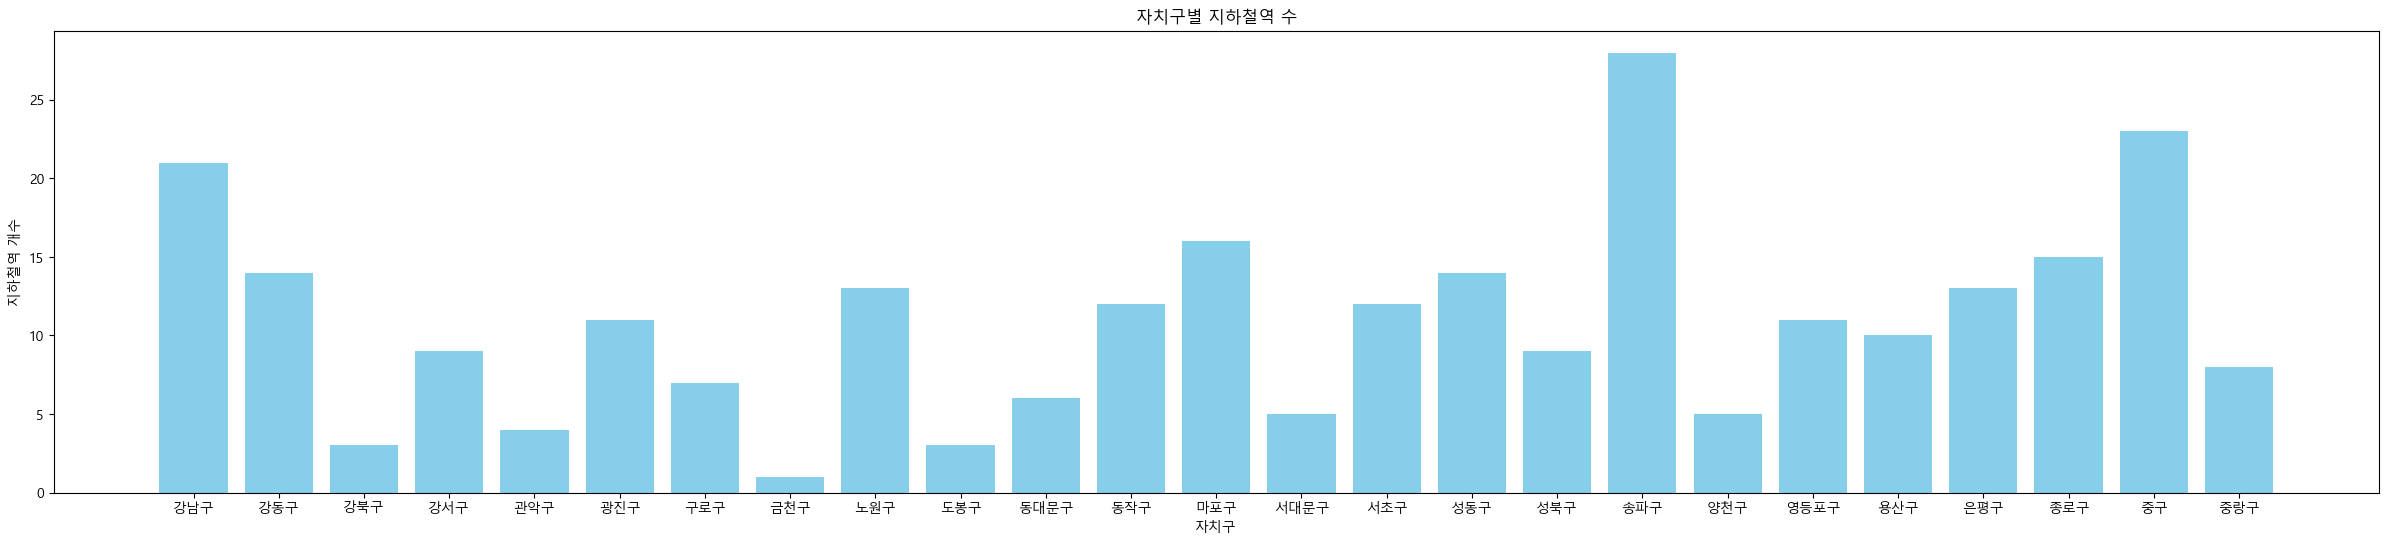

In [95]:
train_2023_df = pd.DataFrame({
    '자치구': ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구',  '중구', '중랑구'],
    '역개수': [21, 14, 3, 9, 4, 11, 7, 1, 13, 3, 6, 12, 16, 5, 12, 14, 9, 28, 5, 11, 10, 13, 15, 23, 8]
})
# 막대그래프 생성
plt.figure(figsize=(30, 6))
plt.bar(train_2021_df['자치구'], train_2021_df['역개수'], color='skyblue')

# 제목과 레이블 추가
plt.title('자치구별 지하철역 수')
plt.xlabel('자치구')
plt.ylabel('지하철역 개수')

# 그래프 표시
plt.show()

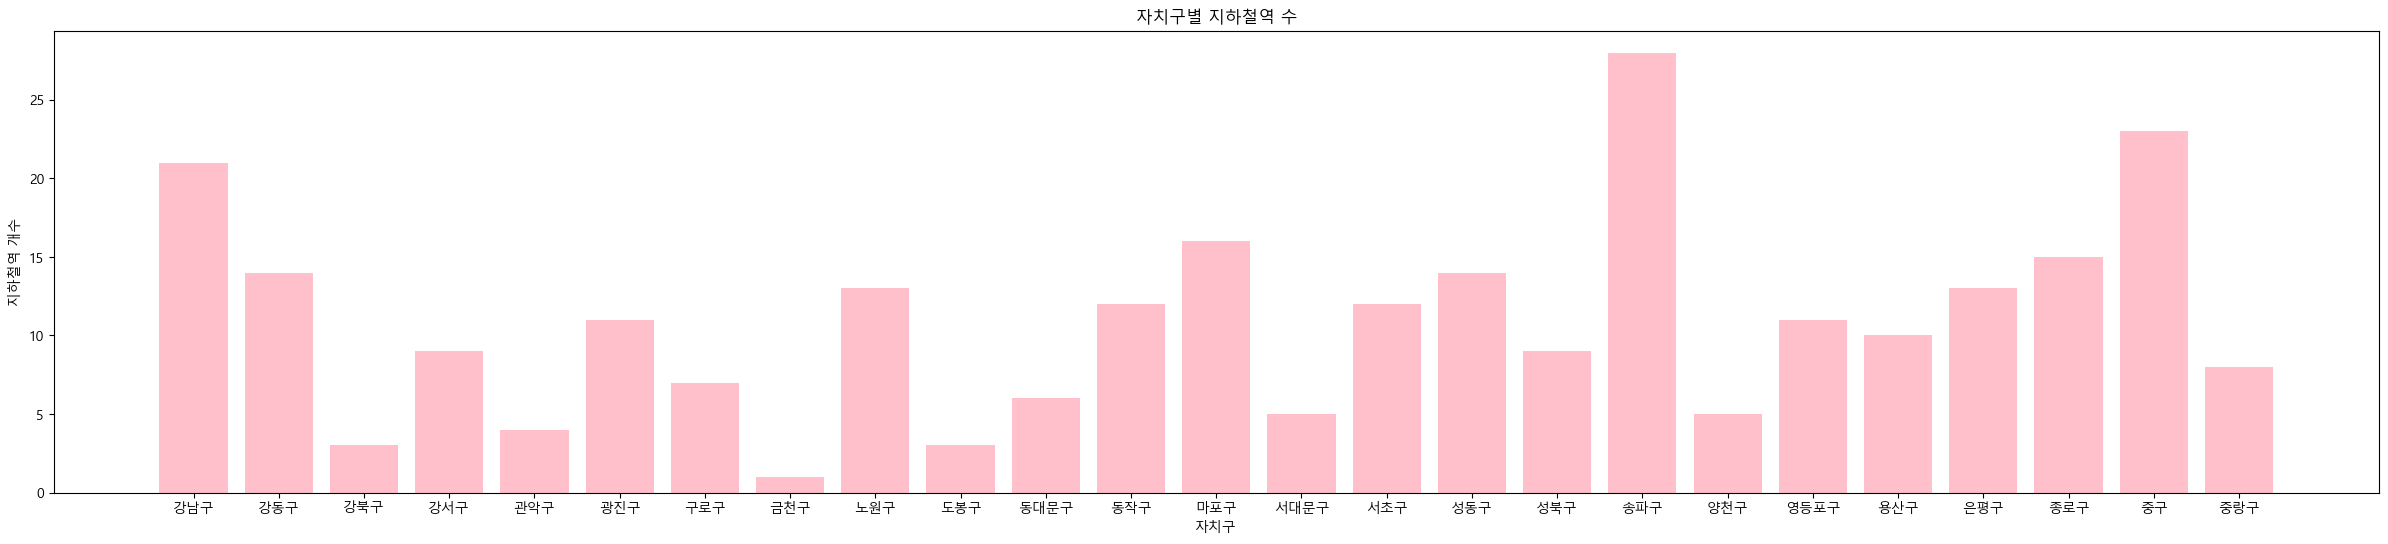

In [96]:
train_2023_df = pd.DataFrame({
    '자치구': ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구',  '중구', '중랑구'],
    '역개수': [21, 14, 3, 9, 4, 11, 7, 1, 13, 3, 6, 12, 16, 5, 12, 14, 9, 28, 5, 11, 10, 13, 15, 23, 8]
})
# 막대그래프 생성
plt.figure(figsize=(30, 6))
plt.bar(train_2022_df['자치구'], train_2022_df['역개수'], color='pink')

# 제목과 레이블 추가
plt.title('자치구별 지하철역 수')
plt.xlabel('자치구')
plt.ylabel('지하철역 개수')

# 그래프 표시
plt.show()

In [ ]:
train_2023_df = pd.DataFrame({
    '자치구': ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구',  '중구', '중랑구'],
    '역개수': [21, 14, 3, 9, 4, 11, 7, 1, 13, 3, 6, 12, 16, 5, 12, 14, 9, 28, 5, 11, 10, 13, 15, 23, 8]
})
# 막대그래프 생성
plt.figure(figsize=(30, 10))
plt.bar(train_2023_df['자치구'], train_2023_df['역개수'], color='orange')

# 제목과 레이블 추가
plt.title('자치구별 지하철역 수')
plt.xlabel('자치구')
plt.ylabel('지하철역 개수')

# 그래프 표시
plt.show()

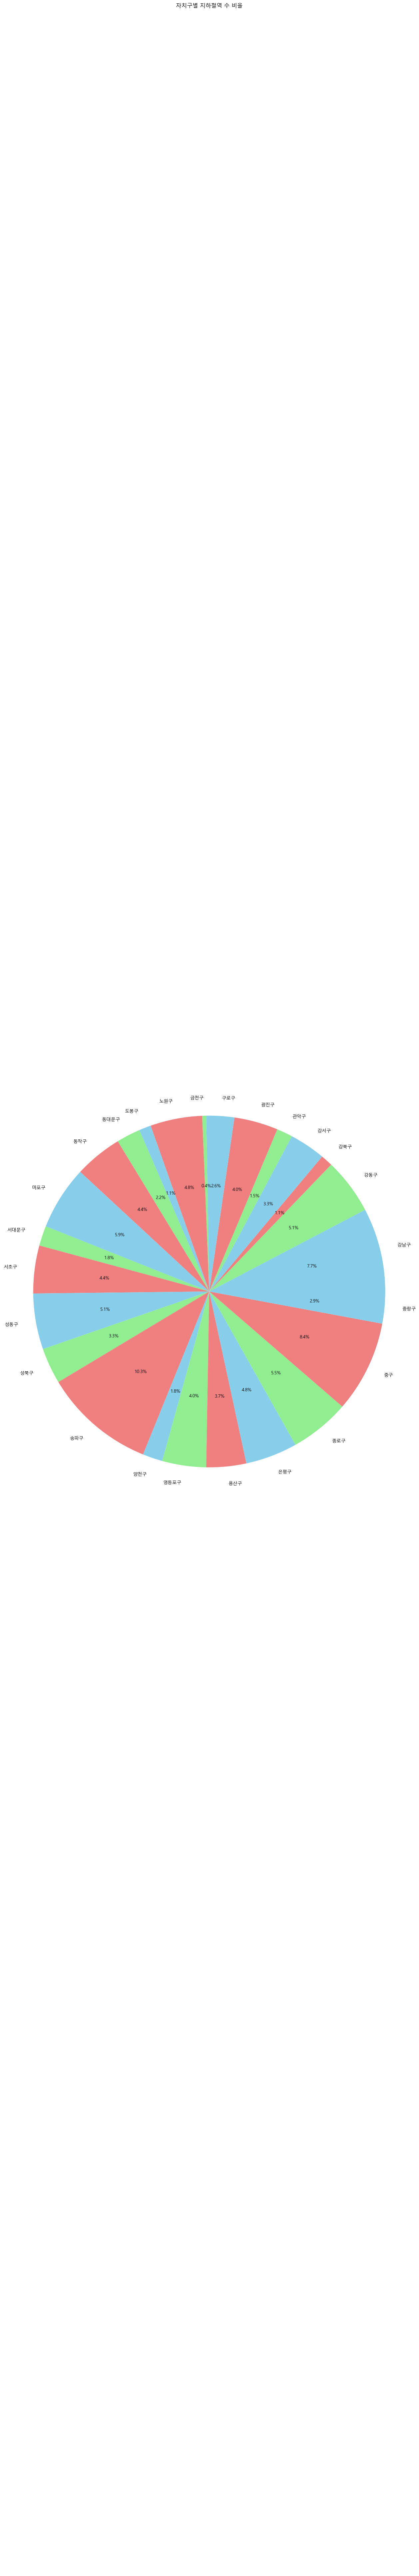

In [97]:
train_2021_df = pd.DataFrame({
    '자치구': ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구',  '중구', '중랑구'],
    '역개수': [21, 14, 3, 9, 4, 11, 7, 1, 13, 3, 6, 12, 16, 5, 12, 14, 9, 28, 5, 11, 10, 13, 15, 23, 8]
})
plt.figure(figsize=(15, 100))
plt.pie(train_2021_df['역개수'], labels=train_2021_df['자치구'], autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('자치구별 지하철역 수 비율')
plt.axis('equal')  # 원형을 동그랗게 보이도록 설정

# 차트 출력
plt.show()

In [98]:
#실행안됨
train_2021_df = pd.DataFrame({
    '자치구': ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구',  '중구', '중랑구'],
    '역개수': [21, 14, 3, 9, 4, 11, 7, 1, 13, 3, 6, 12, 16, 5, 12, 14, 9, 28, 5, 11, 10, 13, 15, 23, 8]
})
# 데이터를 행렬로 변환 (자치구를 인덱스로, 역 개수를 값으로)
pivot_df =train_2021_df.set_index('자치구')['역개수']

# 히트맵 생성
plt.figure(figsize=(8, 60))
sns.heatmap(pivot_df, annot=True, cmap='Blues', cbar=False)

# 제목과 레이블 설정
plt.title('자치구별 지하철역 수 히트맵')
plt.show()

IndexError: Inconsistent shape between the condition and the input (got (25, 1) and (25,))

<Figure size 800x6000 with 0 Axes>

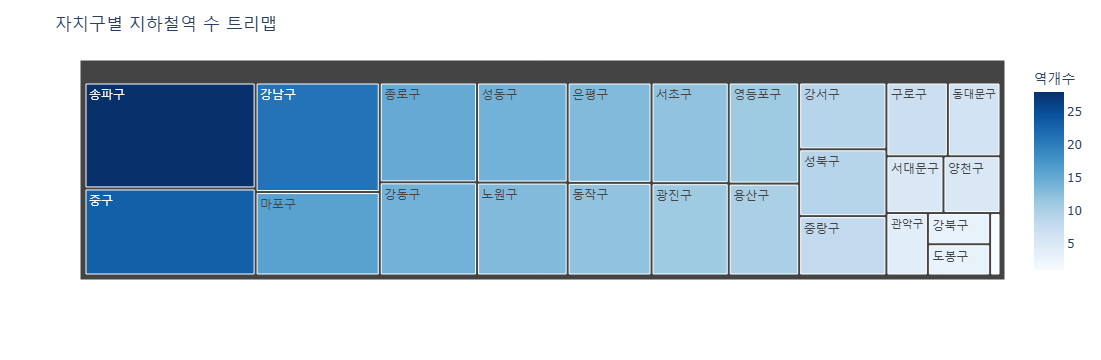

In [99]:
train_2023_df = pd.DataFrame({
    '자치구': ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구',  '중구', '중랑구'],
    '역개수': [21, 14, 3, 9, 4, 11, 7, 1, 13, 3, 6, 12, 16, 5, 12, 14, 9, 28, 5, 11, 10, 13, 15, 23, 8]
})
# 트리맵 시각화
fig = px.treemap(train_2023_df, path=['자치구'], values='역개수', color='역개수', color_continuous_scale='Blues')

# 제목 설정
fig.update_layout(title='자치구별 지하철역 수 트리맵')

# 그래프 출력
fig.show()

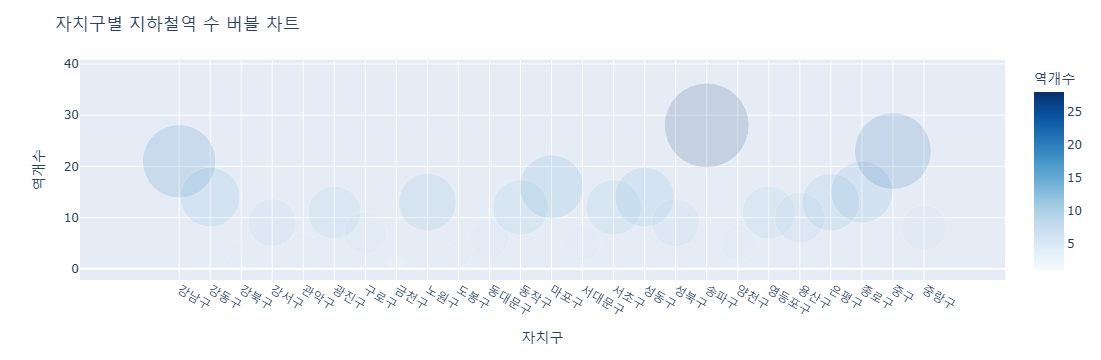

In [100]:
train_2023_df = pd.DataFrame({
    '자치구': ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구',  '중구', '중랑구'],
    '역개수': [21, 14, 3, 9, 4, 11, 7, 1, 13, 3, 6, 12, 16, 5, 12, 14, 9, 28, 5, 11, 10, 13, 15, 23, 8]
})

# 버블 차트 생성
fig = px.scatter(train_2023_df, x='자치구', y='역개수', size='역개수', color='역개수', hover_name='자치구', size_max=60, color_continuous_scale='Blues')

# 제목 설정
fig.update_layout(title='자치구별 지하철역 수 버블 차트')

# 그래프 출력
fig.show()

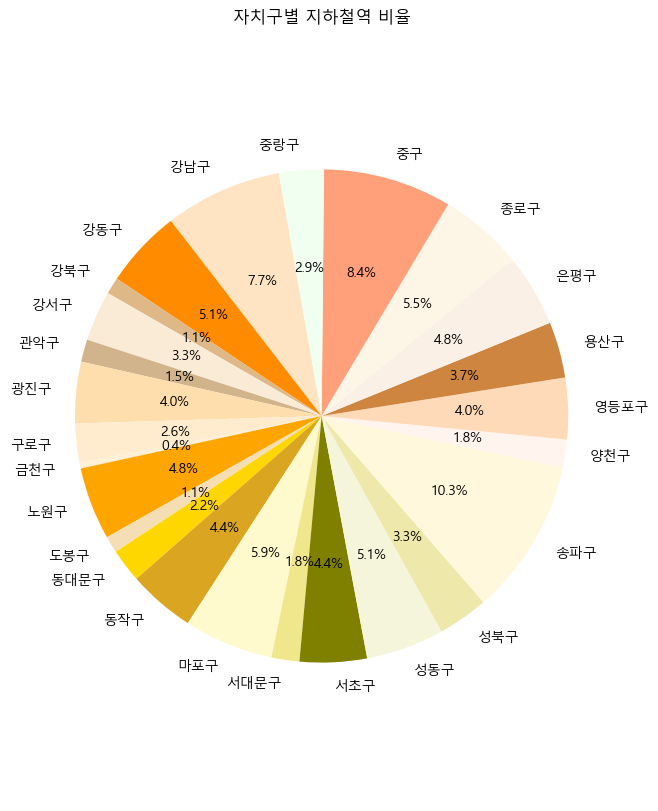

In [126]:
# 예시 데이터 (각 자치구별 지하철 역 개수)
labels = ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구',  '중구', '중랑구']
sizes = [21, 14, 3, 9, 4, 11, 7, 1, 13, 3, 6, 12, 16, 5, 12, 14, 9, 28, 5, 11, 10, 13, 15, 23, 8]  # 각 자치구별 역 개수
colors = ['bisque', 'darkorange', 'burlywood', 'antiquewhite','tan', 'navajowhite', 'blanchedalmond', 'papayawhip','orange', 'wheat', 'gold', 'goldenrod','lemonchiffon', 'khaki', 'olive', 'beige','palegoldenrod', 'cornsilk', 'seashell', 'peachpuff','peru', 'linen', 'oldlace', 'lightsalmon', 'honeydew']  # 색상 설정

# 파이 차트 생성
plt.figure(figsize=(7, 10))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=100)

# 제목 추가
plt.title('자치구별 지하철역 비율')

# 차트 출력
plt.axis('equal')  # 원이 둥글게 보이도록 설정
plt.show()



In [121]:
#섹션 떼어내어 강조하기
explode = (0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2, 0, 0, 0, 0, 0,  0.2, 0)  # 첫 번째 섹션을 10%만큼 떼어냄


([<matplotlib.patches.Wedge at 0x1fa1a492570>,
 [Text(-0.3111103749370916, 1.262224359853074, '강남구'),
  Text(-0.6608165083425089, 0.8793870264576429, '강동구'),
  Text(-0.8191511872551996, 0.7341602906848047, '강북구'),
  Text(-0.9124129798597382, 0.6144123649337415, '강서구'),
  Text(-0.9937954946633487, 0.47156178257661036, '관악구'),
  Text(-1.0600216954270774, 0.29386052001571217, '광진구'),
  Text(-1.097797494898646, 0.06957485317453332, '구로구'),
  Text(-1.0995448143236597, -0.03164176502582078, '금천구'),
  Text(-1.0802303011159633, -0.20761140756450605, '노원구'),
  Text(-1.0239611024838282, -0.4018751803733385, '도봉구'),
  Text(-0.9769267946512316, -0.5055828694610515, '동대문구'),
  Text(-0.8520654161788042, -0.6956899643893403, '동작구'),
  Text(-0.5879123489315718, -0.9297091319190975, '마포구'),
  Text(-0.34833472277179356, -1.0433901096481113, '서대문구'),
  Text(-0.13887110760139523, -1.0911987974120765, '서초구'),
  Text(0.18893504395409194, -1.083652873002266, '성동구'),
  Text(0.46583599657278163, -0.99649226002

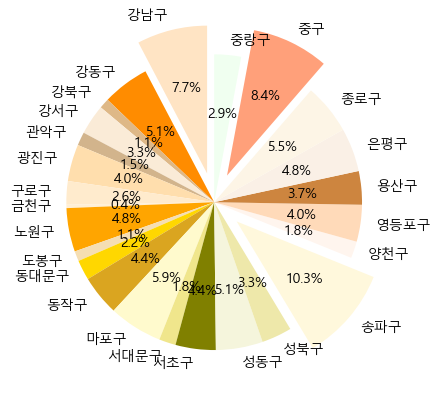

In [122]:
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode)

([<matplotlib.patches.Wedge at 0x1fa162f4ec0>,
 [Text(-0.3111103749370916, 1.262224359853074, '강남구'),
  Text(-0.6608165083425089, 0.8793870264576429, '강동구'),
  Text(-0.8191511872551996, 0.7341602906848047, '강북구'),
  Text(-0.9124129798597382, 0.6144123649337415, '강서구'),
  Text(-0.9937954946633487, 0.47156178257661036, '관악구'),
  Text(-1.0600216954270774, 0.29386052001571217, '광진구'),
  Text(-1.097797494898646, 0.06957485317453332, '구로구'),
  Text(-1.0995448143236597, -0.03164176502582078, '금천구'),
  Text(-1.0802303011159633, -0.20761140756450605, '노원구'),
  Text(-1.0239611024838282, -0.4018751803733385, '도봉구'),
  Text(-0.9769267946512316, -0.5055828694610515, '동대문구'),
  Text(-0.8520654161788042, -0.6956899643893403, '동작구'),
  Text(-0.5879123489315718, -0.9297091319190975, '마포구'),
  Text(-0.34833472277179356, -1.0433901096481113, '서대문구'),
  Text(-0.13887110760139523, -1.0911987974120765, '서초구'),
  Text(0.18893504395409194, -1.083652873002266, '성동구'),
  Text(0.46583599657278163, -0.99649226002

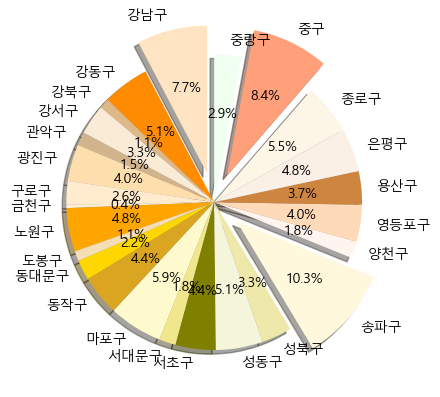

In [124]:
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode, shadow=True)

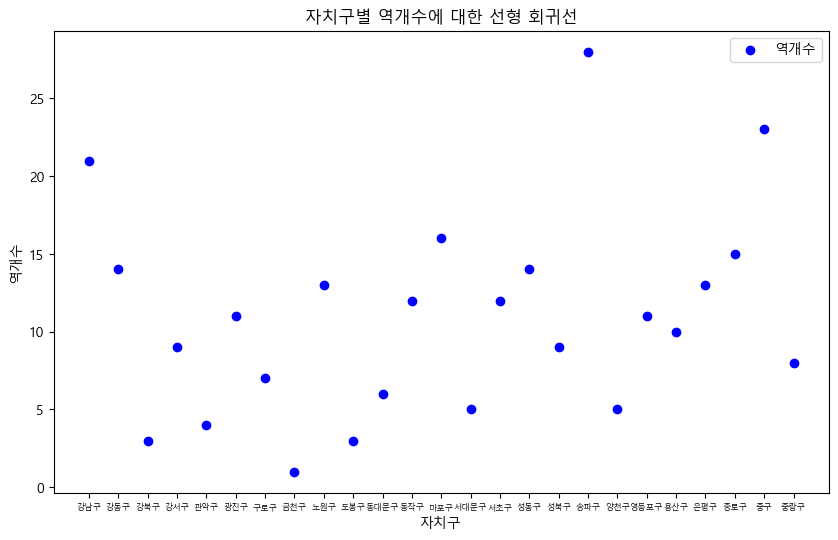

In [21]:

# 예시 데이터 생성 (자치구, 역개수)
data = {
    '자치구': ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구',  '중구', '중랑구'], 
    '역개수': [21, 14, 3, 9, 4, 11, 7, 1, 13, 3, 6, 12, 16, 5, 12, 14, 9, 28, 5, 11, 10, 13, 15, 23, 8]}

# 산점도 크기 조정
plt.figure(figsize=(10, 6))

# DataFrame 생성
train_2023_df = pd.DataFrame(data)

# 자치구를 숫자로 변환 (자치구는 범주형 데이터이므로, 숫자로 변환하여 선형 회귀 적용)
train_2023_df['자치구_번호'] = pd.Categorical(train_2023_df['자치구']).codes  # 범주형 변수의 코드로 변환

# 선형 회귀 모델 생성
X = train_2023_df[['자치구_번호']]  # 자치구 번호를 독립 변수로 사용
y = train_2023_df['역개수']  # 역개수를 종속 변수로 사용

# 회귀 모델 훈련
model = LinearRegression()
model.fit(X, y)

# 회귀선 예측 값
#y_pred = model.predict(X)

# 산점도와 회귀선 그리기
plt.scatter(train_2023_df['자치구_번호'], train_2023_df['역개수'], color='blue', label='역개수')  # 산점도
#plt.plot(train_2023_df['자치구_번호'], y_pred, color='red', label='Regression line')  # 회귀선

# 제목과 레이블 추가
plt.title('자치구별 역개수에 대한 선형 회귀선')
plt.xlabel('자치구')
plt.ylabel('역개수')
plt.xticks(ticks=range(len(train_2023_df['자치구'].unique())), labels=train_2023_df['자치구'].unique(),fontsize=6)  # 자치구 이름으로 x축 라벨 설정
plt.legend()

# 그래프 출력
plt.show()